<a href="https://colab.research.google.com/github/whitepanic/mlp/blob/main/2_%ED%82%A4%EC%9B%8C%EB%93%9C_%EB%B6%84%EC%84%9D(Keyword_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트 설정


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


# MeCab

In [3]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/etc/os-release:PRETTY_NAME="Ubuntu 18.04.5 LTS"
/etc/os-release:HOME_URL="https://www.ubuntu.com/"
/etc/os-release:SUPPORT_URL="https://help.ubuntu.com/"
/etc/os-release:BUG_REPORT_URL="https://bugs.launchpad.net/ubu

In [9]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [10]:
raw_decoded = [x.decode() for x in raw[1:]]

reviews = []
for i in raw_decoded:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


# 형태소 분석


In [12]:
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    nouns.append(noun)

nouns[:30]

['때',
 '디자인',
 '학생',
 '외국',
 '디자이너',
 '그',
 '전통',
 '발전',
 '문화',
 '산업',
 '우리',
 '나라',
 '시절',
 '끝',
 '열정',
 '노라노',
 '전통',
 '저',
 '사람',
 '꿈',
 '수',
 '것',
 '감사',
 '폴리스',
 '스토리',
 '시리즈',
 '뉴',
 '께',
 '하나',
 '최고']

# Stopwords 사전


In [15]:
str_stop_words = "영화 전  난 일  걸 뭐 줄 만  건 분  개 끝  잼 이 번 중  듯 때  게 내  말 나  수 거  점 것"
stop_words = list(set(str_stop_words.split(" ")))
print(stop_words)

['', '것', '때', '일', '줄', '끝', '내', '잼', '이', '중', '거', '말', '전', '만', '수', '개', '듯', '점', '번', '게', '건', '나', '난', '분', '영화', '뭐', '걸']


In [16]:
nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)

nouns[:10]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']

단어 빈도수 측정

In [17]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'감독': 5629,
 '감동': 6489,
 '결말': 2066,
 '공포': 2048,
 '굿': 2110,
 '기대': 3465,
 '기억': 2364,
 '남자': 2078,
 '내용': 5731,
 '년': 4936,
 '돈': 2980,
 '드라마': 6896,
 '때문': 2371,
 '마음': 2128,
 '마지막': 3647,
 '명작': 2685,
 '배우': 5893,
 '사람': 6742,
 '사랑': 4741,
 '생각': 6943,
 '스토리': 7163,
 '시간': 5320,
 '쓰레기': 4585,
 '애': 2730,
 '액션': 3568,
 '여자': 2678,
 '연기': 9175,
 '연출': 2376,
 '우리': 2531,
 '이거': 3930,
 '이건': 3650,
 '이게': 3046,
 '이상': 2676,
 '이야기': 2947,
 '이해': 2745,
 '인생': 2060,
 '작품': 3985,
 '장면': 3262,
 '재미': 5479,
 '전개': 2035,
 '정도': 3656,
 '주인공': 2553,
 '처음': 2673,
 '최고': 8813,
 '최악': 3019,
 '편': 3044,
 '평점': 8514,
 '하나': 3923,
 '한국': 2640,
 '현실': 2193}

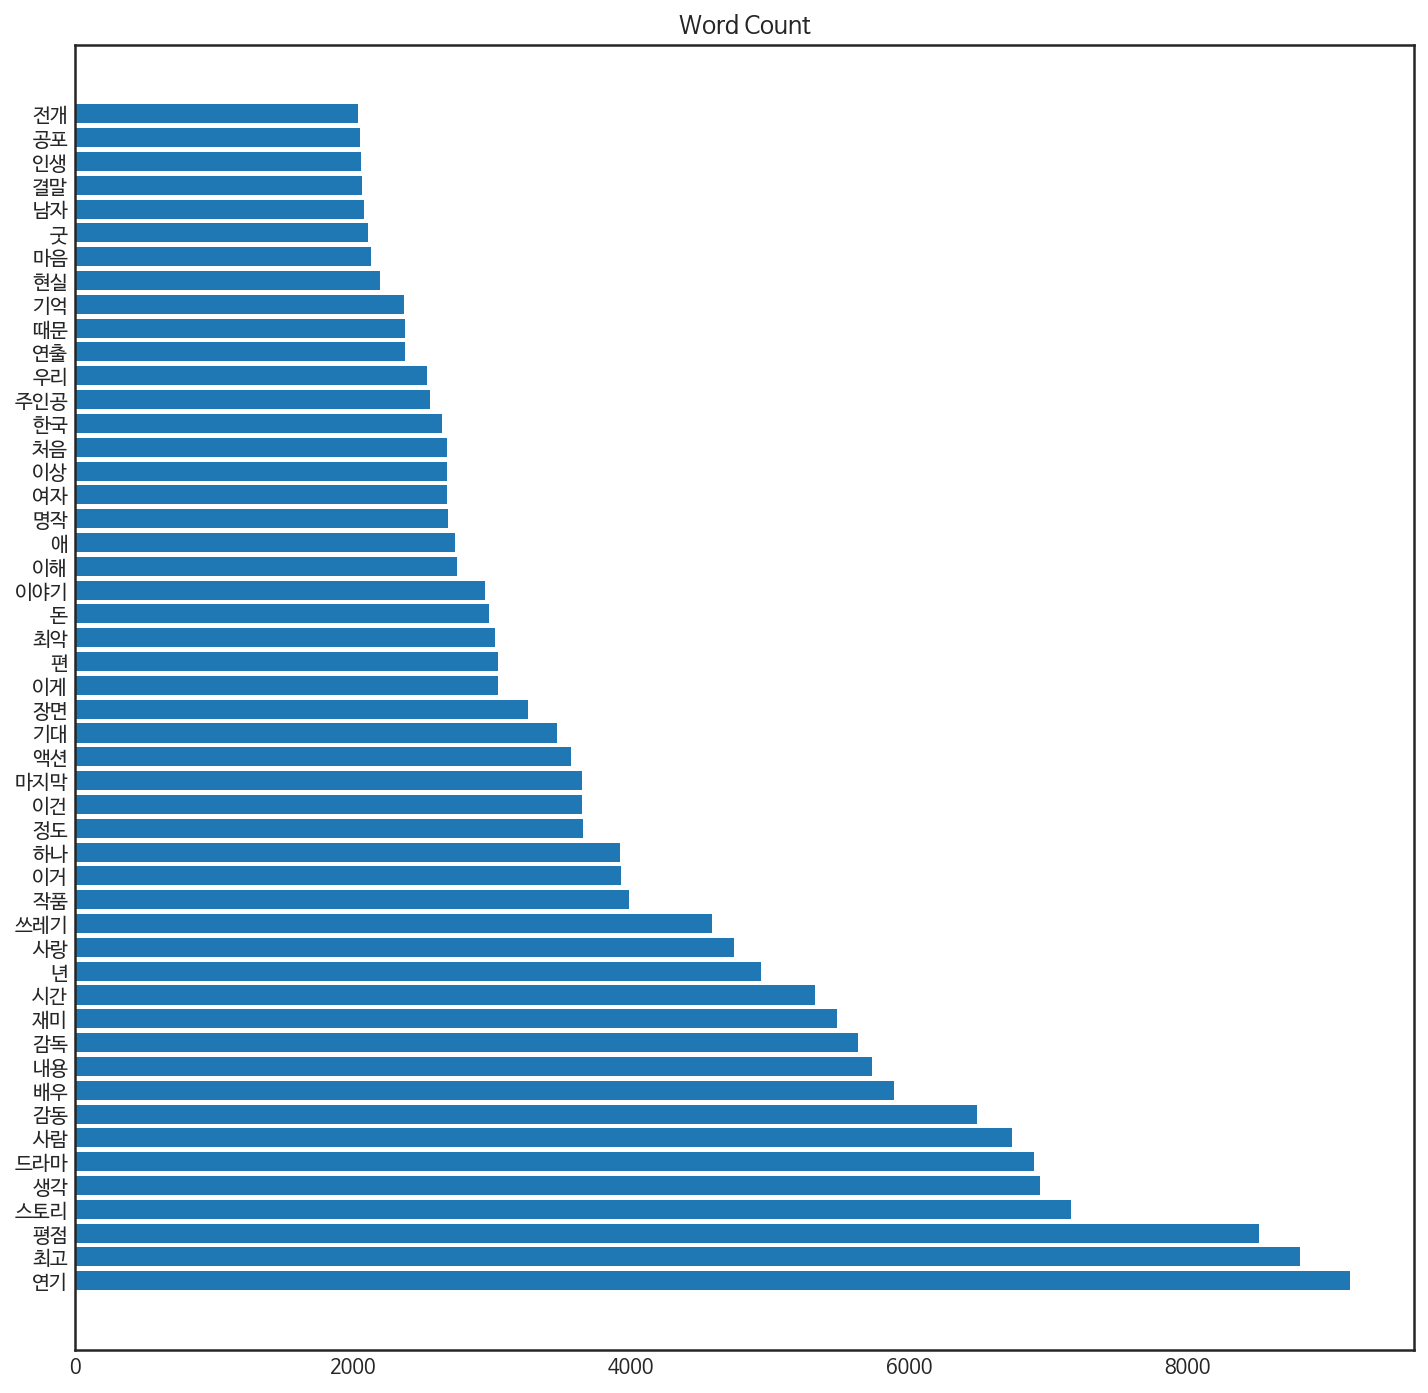

In [18]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

In [19]:
# 워드 클라우드
!pip install wordcloud

In [20]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", font_path="./font/NanumBarunGothic.ttf")
wc.generate_from_frequencies(top_nouns)

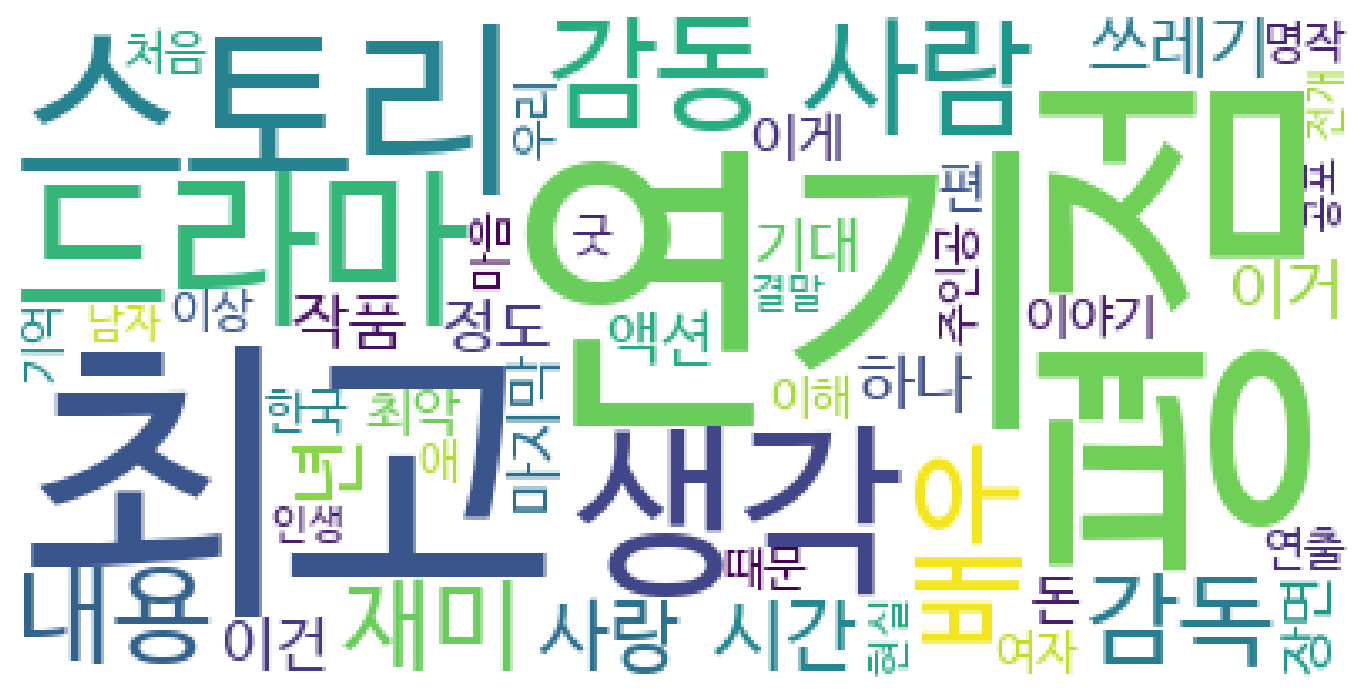

In [21]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1)
ax.axis("off")
ax.imshow(wc)
plt.show()

In [22]:
#squarify 트리맵
! pip install squarify

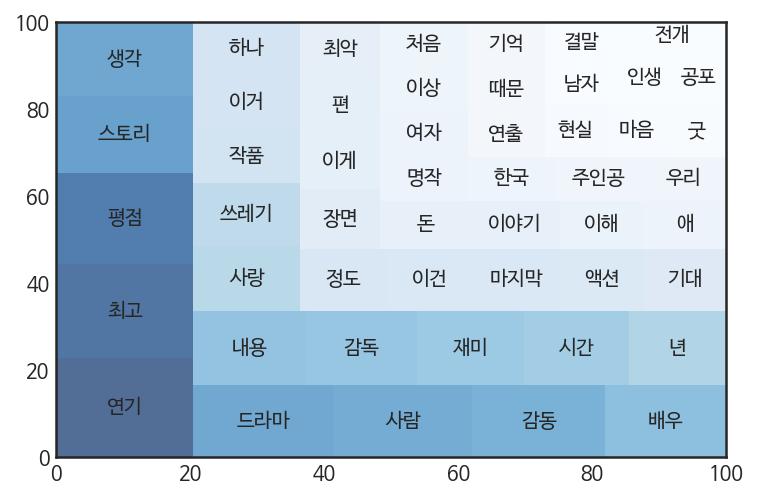

In [26]:
import squarify

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()), vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(), sizes=top_nouns.values(), color=colors, alpha=.7)